# Configuración de datos y parámetros del algoritmo de Random Forest

### Importamos librerias 

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
import seaborn as sns

In [3]:
df = pd.read_csv("./dataset/predictive_transform_2.csv")
df

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20460,2020-04-13 23:30:00,31.0,1.0,28.0,100.0,0.0,0.0,0.0,246.4,244.7,244.3,79.0,45.4,86.6,426.0,422.3,426.1,38.0
20461,2020-04-13 23:45:00,31.0,1.0,28.0,100.0,0.0,0.0,0.0,246.8,245.1,244.8,77.0,42.0,84.2,426.8,423.1,427.1,39.1
20462,2020-04-14 00:00:00,31.0,1.0,28.0,100.0,0.0,0.0,0.0,247.8,246.0,246.0,77.4,37.1,75.4,428.5,425.0,428.7,38.8
20463,2020-04-14 00:15:00,30.0,1.0,28.0,100.0,0.0,0.0,0.0,247.7,245.9,245.5,70.1,36.7,88.1,428.2,424.3,428.4,45.2


In [4]:
values = df["MOG_A"].value_counts()

### Representación del desblance de datos

0.0    18418
1.0     2047
Name: MOG_A, dtype: int64

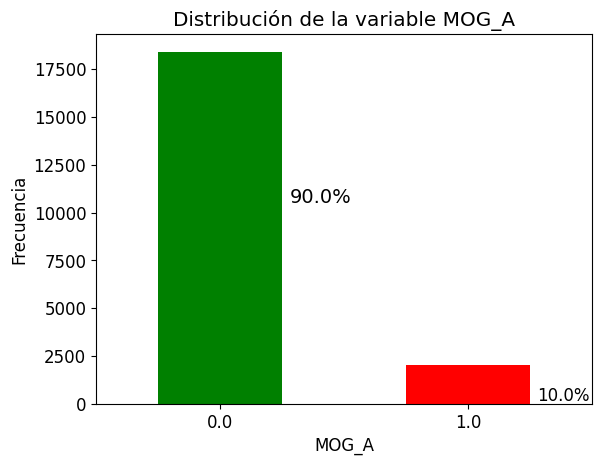

In [6]:
import matplotlib
font = {'size'   : 12}
matplotlib.rc('font', **font)


pd.value_counts(df["MOG_A"]).plot.bar(rot=0, color=["green", "red"])
plt.title('Distribución de la variable MOG_A')
plt.xlabel('MOG_A')
plt.ylabel('Frecuencia')
plt.text(0.28, 10500,str(round(values[0]/(values[0]+values[1]),2)*100) + "%", fontsize=14)
plt.text(1.28, 150,  str(round(values[1]/(values[0]+values[1]),2)*100) + "%", fontsize=12)

df["MOG_A"].value_counts()

### Reducción de ejemplos de entrenamiento

In [8]:
data_0 = df[df["MOG_A"] == 0]
data_1 = df[df["MOG_A"] == 1]
data_0.shape, data_1.shape

((18418, 18), (2047, 18))

In [9]:
data_0 = data_0.sample(n = int(5e+3))
data_0.shape

(5000, 18)

In [10]:
df = data_1.append(data_0)
df["MOG_A"].value_counts()

C:\Users\Victor\AppData\Local\Temp\ipykernel_548\2169110200.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data_1.append(data_0)


0.0    5000
1.0    2047
Name: MOG_A, dtype: int64

In [11]:
df

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
2575,2019-07-13 11:51:00,42.0,0.0,35.0,38.0,0.0,0.0,1.0,233.2,233.7,233.0,1.1,0.9,1.1,405.5,405.3,405.2,0.1
2576,2019-07-13 11:51:00,42.0,0.0,35.0,38.0,0.0,0.0,1.0,233.2,233.7,233.0,1.1,0.9,1.1,405.5,405.3,405.2,0.1
2579,2019-07-13 12:30:00,41.0,0.0,34.0,39.0,0.0,0.0,1.0,232.5,232.8,232.4,143.8,173.1,157.7,403.9,405.1,404.5,25.5
2580,2019-07-13 12:45:00,39.0,0.0,33.0,39.0,0.0,0.0,1.0,232.4,232.9,232.3,150.0,141.5,152.0,402.6,402.9,402.3,9.4
2581,2019-07-13 13:00:00,39.0,0.0,33.0,39.0,0.0,0.0,1.0,232.2,233.1,232.1,148.3,124.5,130.9,404.5,404.5,403.2,22.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5039,2019-08-14 18:30:00,29.0,0.0,28.0,41.0,0.0,0.0,0.0,226.4,225.4,226.8,132.6,137.7,161.6,390.3,391.3,394.2,26.9
9385,2019-10-10 02:30:00,25.0,0.0,24.0,62.0,0.0,0.0,0.0,243.9,243.9,242.5,63.6,50.7,85.3,420.8,423.2,420.2,30.0
13495,2019-12-02 23:30:00,22.0,0.0,19.0,100.0,0.0,0.0,0.0,251.8,251.5,249.3,48.6,27.4,70.2,435.7,432.8,435.9,37.0
9252,2019-10-08 18:15:00,31.0,0.0,29.0,53.0,0.0,0.0,0.0,236.0,236.7,234.5,109.2,85.3,166.7,407.6,410.5,407.0,75.4


### División del dataset en variables X y Y

In [12]:
X = df.drop(columns = ["DeviceTimeStamp", "MOG_A"] , axis=1)
y = df["MOG_A"]

### División del dataset en variables de entrenamiento y evaluación

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Variables dispuestas para el entrenamiento

In [14]:
print((y_train == 0).sum())
print((y_train == 1).sum())

3984
1653


In [15]:
pd.value_counts(y_train)[0]

3984

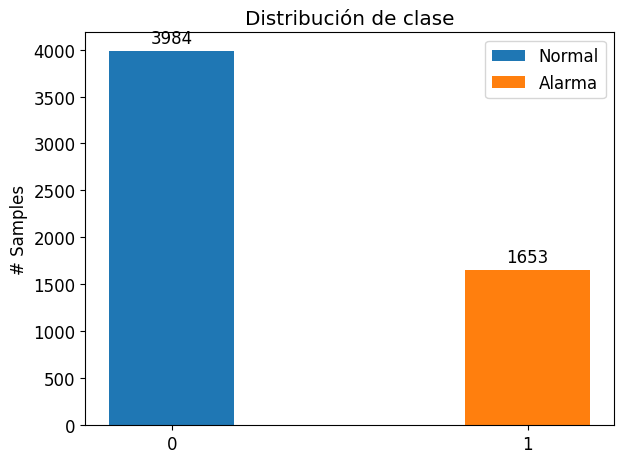

In [16]:
fig, ax = plt.subplots()
rects1 = ax.bar(0, pd.value_counts(y_train)[0], 0.35, label='Normal')
rects2 = ax.bar(1, pd.value_counts(y_train)[1], 0.35, label='Alarma')
ax.set_ylabel('# Samples')
ax.set_title('Distribución de clase')
ax.set_xticks([0,1])
ax.set_xticklabels(['0','1'])
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

In [17]:
def plot_classes(X, y, title, var1,var2, xlab, ylab):
    plt.figure()
    plt.scatter(X[:,var1][y != 1],X[:,var2][y != 1], c="m", alpha=0.2)
    plt.scatter(X[:,var1][y == 1],X[:,var2][y == 1], c="c")
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid()
    plt.show()

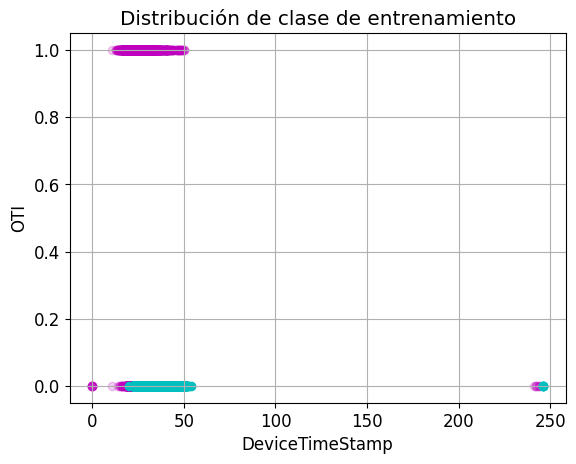

In [18]:
plot_classes(X_train.values,y_train.values, "Distribución de clase de entrenamiento", 0,1, df.columns[0], df.columns[1])

## Clasificación con 1445 ejemplos

In [19]:
def classif_model(X_train, y_train):
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    return clf

def prediction(X_test,clf):
    y_pred_prob = clf.predict_proba(X_test)
    y_pred = clf.predict(X_test)
    return y_pred_prob, y_pred


clf = classif_model(X_train,y_train)
y_pred_prob, y_pred = prediction(X_test,clf) 

F1: 0.95  -- prec: 0.93  -- recall: 0.97  -- acc: 0.97


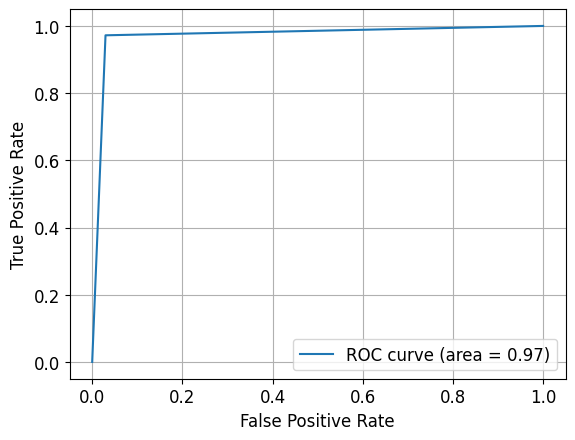

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.988967,0.927361,0.970922,0.958164,0.971752
recall,0.970472,0.972081,0.970922,0.971277,0.970922
f1-score,0.979632,0.949195,0.970922,0.964413,0.971127
support,1016.000000,394.000000,0.970922,1410.000000,1410.000000


[[986  30]
 [ 11 383]]


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


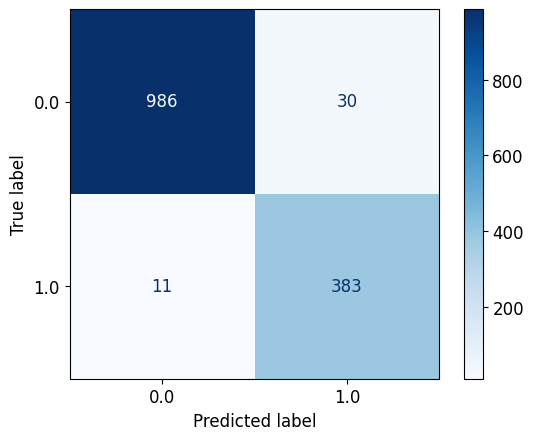

In [20]:
def show_metrics(y_test, y_pred):
    fpr, tpr, ths = roc_curve(y_test,  y_pred)
    auc_ = auc(fpr, tpr)
    f1 = f1_score(y_test,  (y_pred>.5))
    prec = precision_score(y_test,  (y_pred>.5))
    rec = recall_score(y_test,  (y_pred>.5))
    acc = accuracy_score(y_test,  (y_pred>.5))
    print("F1: %.2f" %f1 , " -- prec: %.2f" %prec, " -- recall: %.2f" %rec, " -- acc: %.2f" %acc)
    
    cm = confusion_matrix(y_test, y_pred)

    plt.plot(fpr,tpr, label='ROC curve (area = %.2f)' %auc_)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend()
    plt.grid()
    plt.show()
    d = classification_report(y_test, y_pred,output_dict=True)
    display(pd.DataFrame.from_dict(d))
    
    
show_metrics(y_test, y_pred)
cm_0 = confusion_matrix(y_test, y_pred)
print(cm_0)
plot_confusion_matrix(clf, X_test, y_test, cmap = plt.cm.Blues)

## Clasificación con datos balanceados

In [21]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

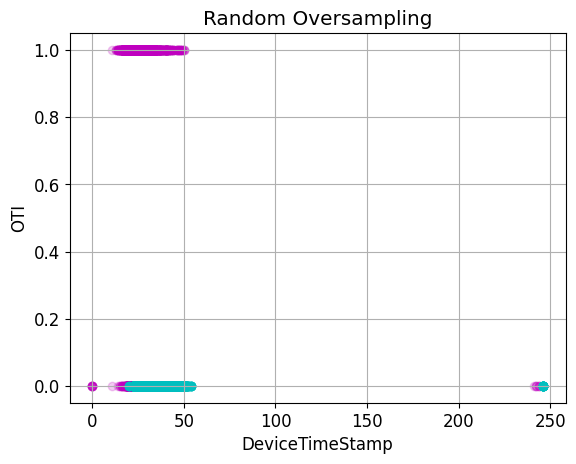

In [22]:
plot_classes(X_ros.values,y_ros.values, 
             "Random Oversampling", 0,1, df.columns[0], df.columns[1])

F1: 0.95  -- prec: 0.93  -- recall: 0.98  -- acc: 0.97


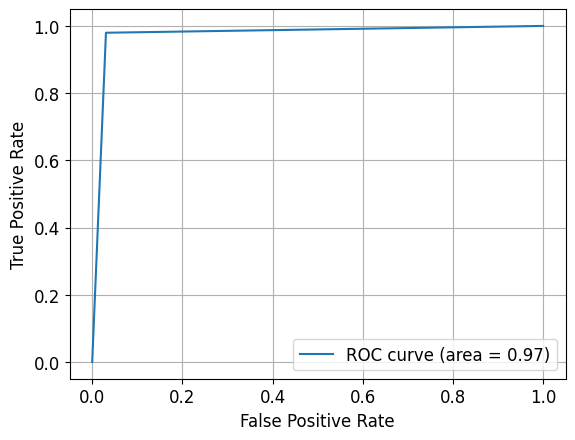

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.991944,0.925659,0.97234,0.958802,0.973422
recall,0.969488,0.979695,0.97234,0.974592,0.972340
f1-score,0.980587,0.951911,0.97234,0.966249,0.972574
support,1016.000000,394.000000,0.97234,1410.000000,1410.000000


[[985  31]
 [  8 386]]


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


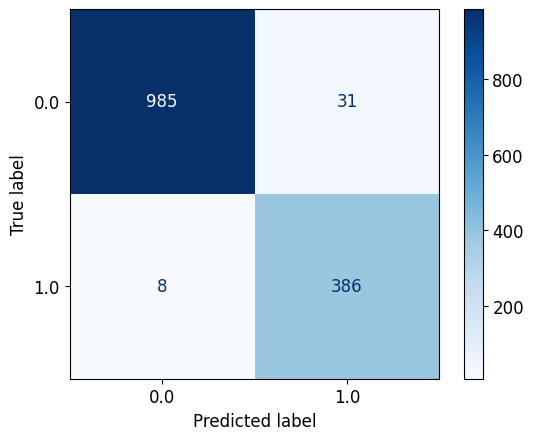

In [23]:
clf_ros = classif_model(X_ros, y_ros)
y_pred_prob_ros , y_pred_ros = prediction(X_test, clf_ros)
show_metrics(y_test, y_pred_ros)

cm = confusion_matrix(y_test, y_pred_ros)
print(cm)
plot_confusion_matrix(clf_ros, X_test, y_test, cmap = plt.cm.Blues)

## Balanceo de datos con SMOTE

In [24]:
from imblearn.over_sampling import SMOTE

X_smote, y_smote = SMOTE().fit_resample(X_train, y_train)

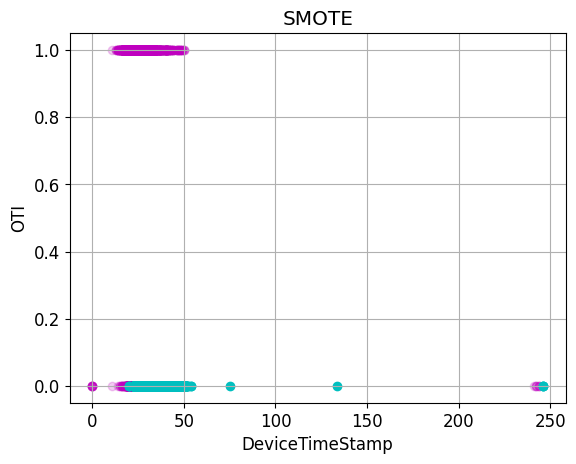

In [25]:
plot_classes(X_smote.values,y_smote.values, 
             "SMOTE", 0,1, df.columns[0], df.columns[1])

F1: 0.95  -- prec: 0.93  -- recall: 0.97  -- acc: 0.97


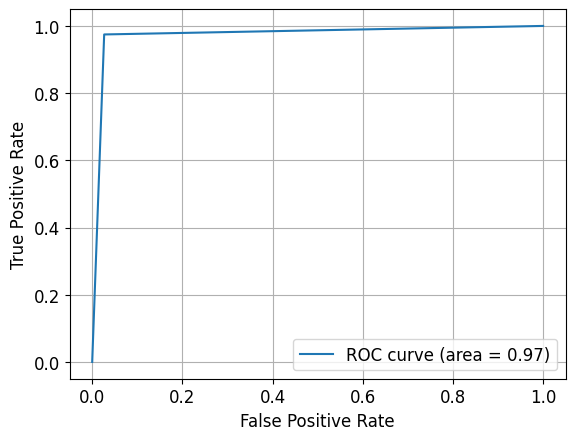

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.989990,0.934307,0.973759,0.962148,0.974430
recall,0.973425,0.974619,0.973759,0.974022,0.973759
f1-score,0.981638,0.954037,0.973759,0.967837,0.973925
support,1016.000000,394.000000,0.973759,1410.000000,1410.000000


[[989  27]
 [ 10 384]]


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


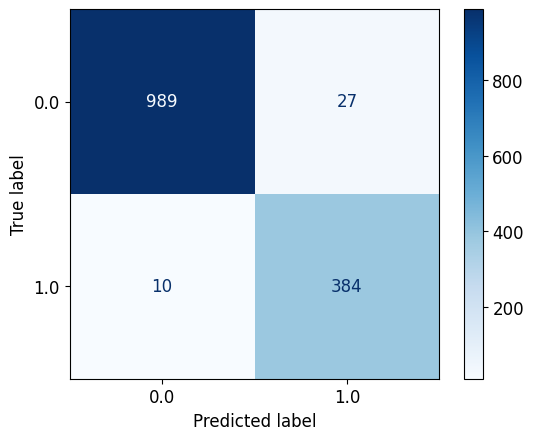

In [32]:
clf_smt = classif_model(X_smote, y_smote)
y_pred_prob_smt , y_pred_smt = prediction(X_test, clf_smt)
show_metrics(y_test, y_pred_smt)

cm = confusion_matrix(y_test, y_pred_smt)
print(cm)

plot_confusion_matrix(clf_smt, X_test, y_test, cmap = plt.cm.Blues)

### Importancia de las variables

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

clf.feature_importances_

array([0.0223173 , 0.00585184, 0.02149611, 0.42948606, 0.00075731,
       0.00108833, 0.05647792, 0.0677761 , 0.05478715, 0.04842932,
       0.06297793, 0.04658771, 0.04422426, 0.05567482, 0.05260266,
       0.02946516])

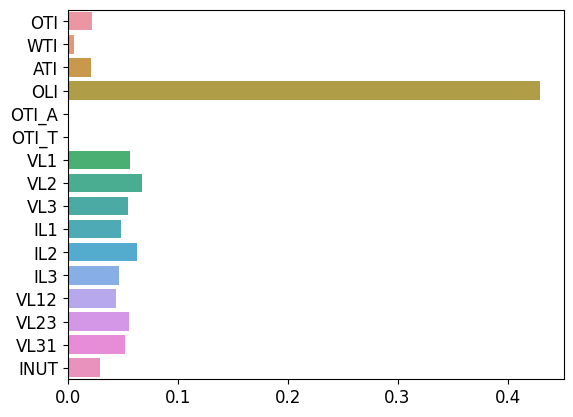

In [27]:
sns.barplot(y = X.columns, x = clf.feature_importances_);

## Serialización del modelo

In [2]:
import joblib

In [54]:
joblib.dump(clf_smt, 'modelo_entrenado_2.pkl')

['modelo_entrenado_2.pkl']

## Cargado del modelo

In [3]:
modelo = joblib.load('modelo_entrenado_2.pkl')


## Testeo del modelo entrenado para el datset del año 2019

In [4]:
df2 = pd.read_csv("./dataset/predictive_transform_2.csv")
df2

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A,VL1,VL2,VL3,IL1,IL2,IL3,VL12,VL23,VL31,INUT
0,2019-06-25 13:06:00,0.0,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019-06-27 10:49:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0,238.7,238.7,238.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2019-06-27 10:51:00,0.0,0.0,0.0,38.0,0.0,0.0,0.0,238.4,238.5,238.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019-06-27 10:52:00,0.0,0.0,0.0,39.0,0.0,0.0,0.0,239.9,240.0,240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20460,2020-04-13 23:30:00,31.0,1.0,28.0,100.0,0.0,0.0,0.0,246.4,244.7,244.3,79.0,45.4,86.6,426.0,422.3,426.1,38.0
20461,2020-04-13 23:45:00,31.0,1.0,28.0,100.0,0.0,0.0,0.0,246.8,245.1,244.8,77.0,42.0,84.2,426.8,423.1,427.1,39.1
20462,2020-04-14 00:00:00,31.0,1.0,28.0,100.0,0.0,0.0,0.0,247.8,246.0,246.0,77.4,37.1,75.4,428.5,425.0,428.7,38.8
20463,2020-04-14 00:15:00,30.0,1.0,28.0,100.0,0.0,0.0,0.0,247.7,245.9,245.5,70.1,36.7,88.1,428.2,424.3,428.4,45.2


In [5]:
X_data = df2.drop(columns = ["DeviceTimeStamp", "MOG_A"] , axis=1)
y_data = df2["MOG_A"]

In [6]:
y_predict_rf = modelo.predict(X_data)

In [7]:
rf_accuracy = round(accuracy_score(y_data, y_predict_rf)*100, 2)

print("Exactitud del modelo :",rf_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Informe de clasificación : \n",classification_report(y_data, y_predict_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Exactitud del modelo : 98.5 %
--------------------------------------------------------
Informe de clasificación : 
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99     18418
         1.0       0.87      1.00      0.93      2047

    accuracy                           0.99     20465
   macro avg       0.94      0.99      0.96     20465
weighted avg       0.99      0.99      0.99     20465

--------------------------------------------------------


c:\Users\Victor\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


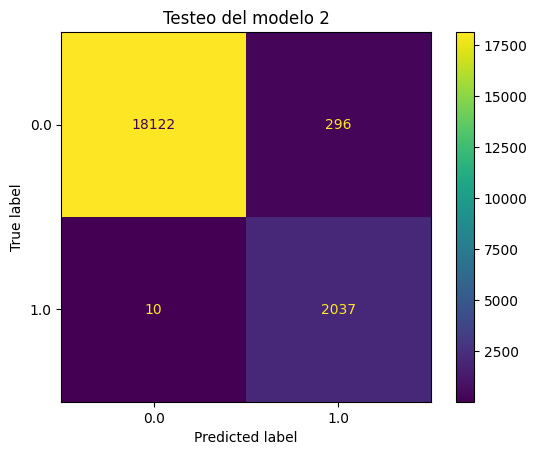

In [8]:
plot_confusion_matrix(modelo, X_data, y_data);
plt.title("Testeo del modelo 2")
plt.show()